<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-custom-functions" data-toc-modified-id="Import-custom-functions-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Import custom functions</a></span></li><li><span><a href="#Read-in-Files" data-toc-modified-id="Read-in-Files-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Read in Files</a></span><ul class="toc-item"><li><span><a href="#Results-and-model-data" data-toc-modified-id="Results-and-model-data-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Results and model data</a></span></li><li><span><a href="#Bookie-Data" data-toc-modified-id="Bookie-Data-0.2.2"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>Bookie Data</a></span></li><li><span><a href="#Teamnames-Lookup" data-toc-modified-id="Teamnames-Lookup-0.2.3"><span class="toc-item-num">0.2.3&nbsp;&nbsp;</span>Teamnames Lookup</a></span></li><li><span><a href="#Transfermarkt" data-toc-modified-id="Transfermarkt-0.2.4"><span class="toc-item-num">0.2.4&nbsp;&nbsp;</span>Transfermarkt</a></span></li><li><span><a href="#XG-Predictions-file" data-toc-modified-id="XG-Predictions-file-0.2.5"><span class="toc-item-num">0.2.5&nbsp;&nbsp;</span>XG Predictions file</a></span></li><li><span><a href="#Create-Season-Order" data-toc-modified-id="Create-Season-Order-0.2.6"><span class="toc-item-num">0.2.6&nbsp;&nbsp;</span>Create Season Order</a></span></li></ul></li><li><span><a href="#Create-single-line-df" data-toc-modified-id="Create-single-line-df-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Create single line df</a></span></li><li><span><a href="#Feature-labelling" data-toc-modified-id="Feature-labelling-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Feature labelling</a></span><ul class="toc-item"><li><span><a href="#Split-out-seasons" data-toc-modified-id="Split-out-seasons-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Split out seasons</a></span></li><li><span><a href="#Create-target-goals-dataframe" data-toc-modified-id="Create-target-goals-dataframe-0.4.2"><span class="toc-item-num">0.4.2&nbsp;&nbsp;</span>Create target goals dataframe</a></span></li><li><span><a href="#Variable-lists" data-toc-modified-id="Variable-lists-0.4.3"><span class="toc-item-num">0.4.3&nbsp;&nbsp;</span>Variable lists</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-0.4.4"><span class="toc-item-num">0.4.4&nbsp;&nbsp;</span>Scaling</a></span></li></ul></li></ul></li><li><span><a href="#End-to-end" data-toc-modified-id="End-to-end-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>End to end</a></span><ul class="toc-item"><li><span><a href="#Define-Functions" data-toc-modified-id="Define-Functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Define Functions</a></span></li><li><span><a href="#Run-fit-and-predict-model" data-toc-modified-id="Run-fit-and-predict-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Run fit and predict model</a></span></li><li><span><a href="#Compare-Log-Loss" data-toc-modified-id="Compare-Log-Loss-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Compare Log Loss</a></span></li></ul></li><li><span><a href="#Compare-to-bookies" data-toc-modified-id="Compare-to-bookies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare to bookies</a></span><ul class="toc-item"><li><span><a href="#Train-on-80%-sample-of-2014-2017" data-toc-modified-id="Train-on-80%-sample-of-2014-2017-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train on 80% sample of 2014-2017</a></span></li><li><span><a href="#Include-2018-+2019" data-toc-modified-id="Include-2018-+2019-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Include 2018 +2019</a></span></li><li><span><a href="#Fit-to-all-of-2018-data" data-toc-modified-id="Fit-to-all-of-2018-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fit to all of 2018 data</a></span></li><li><span><a href="#Include-2018-+2019" data-toc-modified-id="Include-2018-+2019-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Include 2018 +2019</a></span></li></ul></li><li><span><a href="#Plot-Team-Strengths" data-toc-modified-id="Plot-Team-Strengths-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot Team Strengths</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import log_loss


from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict
from sklearn import ensemble, metrics, model_selection as ms, preprocessing, tree
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model, tree, discriminant_analysis, naive_bayes, ensemble, gaussian_process

import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 70)
import datetime


from pathlib import Path
import os
from os import listdir
from os.path import isfile, join

from sklearn.feature_selection import RFECV

import random


## Import custom functions

In [2]:
from _00_BettingFunctions import (create_model_probs_df,returns,expected_returns,result_returns,
                              determine_bet,most_likely_result,prediction_correct,bet_index_cutoff,bet_profit,
                              full_gambling_calc,full_gambling_calc_cutoff)

In [3]:
from _00_DataPrepFunctions import (lookupclean, ema_no_reset, moving_average_no_reset, restructure_ema, create_model_base_scaled,
                                   create_model_base)

In [4]:
from _00_OptimiseAlphaFunctions import (optimise_alpha_classifier,optimise_alpha,track_best_span)

In [ ]:
from _00_TeamStrengthFunctions import fitStrModel,fitScoreModel,simulate_match

## Read in Files

### Results and model data

In [3]:
results = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\ff_us_1419.csv").drop("Unnamed: 0",axis=1)
results.tail(1)

,season,gameweek,matchid,fixture,matchdate,f_Team,f_HmGame,f_Possession,f_Touches - Final Third,f_Touches - Penalty Area,f_Passes - Final Third - Successful,f_Chances Created,f_Goals,f_Goals From Penalties,f_Goal Attempts,f_Shots - Inside Box,f_Big Chances Total,f_Shots On Target,f_Goal Attempts In Box Conceded,f_Shots Conceded,f_Shots On Target Conceded,f_Big Chances Conceded,f_xG Open Play,f_xG Expected Goals,f_xA Expected Assists,f_Goals Conceded,f_xG Conceded,f_Touches - Final Third Conceded,f_Touches - Penalty Area Conceded,f_Passes - Final Third - Successful Conceded,f_xG Open Play Conceded,f_US xG,f_US xG Conceded,f_Points,f_Chances Conceded,gw_no,f_Touches - Final Third log,f_xA Expected Assists Conceded
4355,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Wolverhampton Wanderers,0,34.1,128,25,42,10,3,0,14,11,4,4,10,13,5,3,2.18,2.56,0.48,2,1.7,189,23,82,1.61,2.62405,1.63078,3,9,28,4.85203,0.42


### Bookie Data

In [4]:
odds = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\bookie_odds.csv").drop("Unnamed: 0",axis=1)
odds_clean = odds[["season","fixture","FTR","bookie","BookieHomeOdds","BookieDrawOdds"
                  ,"BookieAwayOdds","BookieHomeProb","BookieDrawProb","BookieAwayProb"]].copy()
odds_clean.tail(1)

,season,fixture,FTR,bookie,BookieHomeOdds,BookieDrawOdds,BookieAwayOdds,BookieHomeProb,BookieDrawProb,BookieAwayProb
2187,2019,Sheffield United vs Arsenal,H,Bet365,3.9,3.75,1.9,0.25641,0.266667,0.526316


In [5]:
merge_vars = ["season","matchid","gw_no","fixture","matchdate"]
team_vars = ["HomeTeam","AwayTeam"]
pred_cols = ["Model_Prob_"+col for col in ["A","D","H"]]
gamble_cols = merge_vars + team_vars + pred_cols
print(gamble_cols)

['season', 'matchid', 'gw_no', 'fixture', 'matchdate', 'HomeTeam', 'AwayTeam', 'Model_Prob_A', 'Model_Prob_D', 'Model_Prob_H']


### Teamnames Lookup

In [6]:
TeamNames = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\PremTeamNamesLookup.csv")
TeamNames.tail(1)

,league,FootballData,Understat,FFScout,Transfermarkt
29,EPL,Wolves,Wolverhampton Wanderers,Wolverhampton Wanderers,Wolverhampton Wanderers


### Transfermarkt

In [70]:
transfermarkt = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\PremierLeaguePredictions\data\TransferMarkt.csv")
transfermarkt.tail(2)

,Season,Club,Squad,Age,Foreigners,TotalMarket,AverageMarketValue
118,2014,Leicester City,37,25.9,18,50.27,1.36
119,2014,Burnley FC,30,25.5,13,33.08,1.10


In [8]:
def lookupclean(lkup,newFile,newFileName,keepName,joinName):
    output = lkup[[keepName,joinName]].copy()
    output = pd.merge(output,newFile,left_on=joinName,right_on=newFileName)
    output = output.drop([joinName,newFileName],axis=1)
    return output

transfermarkt_clean = lookupclean(TeamNames,transfermarkt,"Club","FFScout","Transfermarkt")
transfermarkt_clean.head(1)

,FFScout,Season,Squad,Age,Foreigners,TotalMarket,AverageMarketValue
0,Arsenal,2018,42,23.9,28,533.97,12.71


In [9]:
AMVMean =(transfermarkt_clean.groupby("Season")[["AverageMarketValue"]].mean().reset_index().rename(columns={"AverageMarketValue":"AVMMean"}))
AMVMean

tm = pd.merge(transfermarkt_clean,AMVMean)
tm["AMVIndex"]=tm["AverageMarketValue"]/tm["AVMMean"]

tm.head(1)

,FFScout,Season,Squad,Age,Foreigners,TotalMarket,AverageMarketValue,AVMMean,AMVIndex
0,Arsenal,2018,42,23.9,28,533.97,12.71,9.4475,1.345329


### XG Predictions file

In [10]:
xg_pred_cols = ["AttStr_Home","DefStr_Home","AttStr_Away","DefStr_Away","Pred_HG","Pred_AG"]

In [11]:
xg_pred = pd.read_csv(r"C:\\Users\Byron\Documents\Football Predictions\UnderstatPredictions\Datasets\xg_predictions.csv")
xg_pred = xg_pred[(xg_pred["league"]=="EPL") &
                 (xg_pred["AverageMethod"]=="EMA No reset")]

xg_pred["season"] = xg_pred["season"].apply(lambda x: x[:4])

xg_pred_clean = xg_pred[["season","fixture","season_gw","Team_Home","Team_Away","AttStr_Home",
                  "DefStr_Home","AttStr_Away","DefStr_Away","Pred_HG","Pred_AG"]].dropna()

xg_pred_clean = lookupclean(TeamNames,xg_pred_clean,"Team_Home","FFScout","Understat").rename(columns={"FFScout":"HomeTeam"})
xg_pred_clean = lookupclean(TeamNames,xg_pred_clean,"Team_Away","FFScout","Understat").rename(columns={"FFScout":"AwayTeam"})
xg_pred_clean["fixture"] = xg_pred_clean["HomeTeam"]+ " vs " + xg_pred_clean["AwayTeam"]
xg_pred_clean["season"] = xg_pred_clean["season"].apply(lambda x: int(x))
xg_pred_clean = xg_pred_clean.drop(columns=["HomeTeam","AwayTeam"])

xg_pred_clean.sort_values(by=["season","season_gw"])

,season,fixture,season_gw,AttStr_Home,DefStr_Home,AttStr_Away,DefStr_Away,Pred_HG,Pred_AG
37,2014,Leicester City vs Arsenal,3,0.819551,1.215063,1.352023,0.690942,0.707827,1.971351
450,2014,Everton vs Chelsea,3,0.891405,1.230540,1.883101,0.419984,0.467970,2.780677
594,2014,Newcastle United vs Crystal Palace,3,0.750911,0.888431,0.357083,1.308263,1.227987,0.380693
805,2014,Aston Villa vs Hull City,3,0.637036,0.512088,0.897422,1.586437,1.263272,0.551470
1037,2014,Tottenham Hotspur vs Liverpool,3,1.560331,1.317310,1.006601,1.295523,2.526805,1.591206
...,...,...,...,...,...,...,...,...,...
1407,2019,Manchester City vs Norwich City,38,1.725867,0.577955,0.720922,1.228322,2.284803,0.376152
1456,2019,Southampton vs Sheffield United,38,0.992274,0.963071,0.923272,0.888197,0.949882,0.802729
1810,2019,Crystal Palace vs Tottenham Hotspur,38,0.717594,1.014103,0.990250,0.992783,0.767825,0.906584
1892,2019,Arsenal vs Watford,38,1.021431,1.020375,0.866156,1.114085,1.226469,0.797879


In [12]:
xg_pred.head(2)

,league,season,fixture,season_gw,Team_Home,Team_Away,homegoals,awaygoals,Result,AverageMethod,xG_av_Home,xGA_av_Home,AttStr_Home,DefStr_Home,xG_av_Away,xGA_av_Away,AttStr_Away,DefStr_Away,SeasonHG,SeasonAG,Pred_HG,Pred_AG,Prob_HG,Prob_AG,score,HomeProb,DrawProb,AwayProb,PredScore,PredScoreProb,PredResult,PredResultProb,PredResultScore,PredResultScoreProb,FinalResultProb,FinalScore,PredCorrect,PredResultScoreCorrect,PredScoreCorrect
7344,EPL,2014,Manchester United vs Swansea,1,Manchester United,Swansea,1.0,2.0,A,EMA No reset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173203,1.013072,NaN,NaN,[nan nan nan nan nan nan nan nan nan nan],[nan nan nan nan nan nan nan nan nan nan],0 1 2 3 4 5 6 7 8 9\n0 N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 . 2,0,0,0
7348,EPL,2014,Leicester vs Everton,1,Leicester,Everton,2.0,2.0,D,EMA No reset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.173203,1.013072,NaN,NaN,[nan nan nan nan nan nan nan nan nan nan],[nan nan nan nan nan nan nan nan nan nan],0 1 2 3 4 5 6 7 8 9\n0 N...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 . 2,0,0,0


### Create Season Order

In [13]:
season_list = [2014,2015,2016,2017,2018,2019]
season_gws = range(1,39)
final_order = pd.DataFrame()
x= 1
for i in season_list:
    for j in season_gws:
        gw_order=pd.DataFrame(data={"season":i,"gw_no":j,"gw_sq":x},index=[0])
        final_order = final_order.append(gw_order)
        x = x+1
        
results = pd.merge(results,final_order, on = ["season","gw_no"]).copy()
results.tail(2)

,season,gameweek,matchid,fixture,matchdate,f_Team,f_HmGame,f_Possession,f_Touches - Final Third,f_Touches - Penalty Area,f_Passes - Final Third - Successful,f_Chances Created,f_Goals,f_Goals From Penalties,f_Goal Attempts,f_Shots - Inside Box,f_Big Chances Total,f_Shots On Target,f_Goal Attempts In Box Conceded,f_Shots Conceded,f_Shots On Target Conceded,f_Big Chances Conceded,f_xG Open Play,f_xG Expected Goals,f_xA Expected Assists,f_Goals Conceded,f_xG Conceded,f_Touches - Final Third Conceded,f_Touches - Penalty Area Conceded,f_Passes - Final Third - Successful Conceded,f_xG Open Play Conceded,f_US xG,f_US xG Conceded,f_Points,f_Chances Conceded,gw_no,f_Touches - Final Third log,f_xA Expected Assists Conceded,gw_sq
4354,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Tottenham Hotspur,1,65.9,189,23,82,9,2,0,13,10,3,5,11,14,4,4,1.61,1.70,0.42,3,2.56,128,25,42,2.18,1.63078,2.62405,0,10,28,5.241747,0.48,218
4355,2019,Gameweek 28,/matches/1059979/,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Wolverhampton Wanderers,0,34.1,128,25,42,10,3,0,14,11,4,4,10,13,5,3,2.18,2.56,0.48,2,1.70,189,23,82,1.61,2.62405,1.63078,3,9,28,4.852030,0.42,218


## Create single line df
We will use our results dataset to create a single line results dataset that contains the Result. This will be our target variable.

In [14]:
def home_teams(df,keep):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==1")
    outdf = outdf[keep]
    outdf=outdf.rename(columns={'f_Team': 'HomeTeam'})
    return outdf

def away_teams(df,keep):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==0")
    outdf = outdf[keep]
    outdf=outdf.rename(columns={'f_Team': 'AwayTeam'})
    return outdf

def fixture_scores(df,score_keep_vars):
    outdf = df.copy()
    outdf = outdf.query("f_HmGame==1")
    outdf = outdf[score_keep_vars]
    outdf=outdf.rename(columns={'f_Goals': 'HomeGoals',
                                'f_Goals Conceded': 'AwayGoals'})
    return outdf

def join_fixtures(home,away,scores,merge_vars):
    outdf= pd.merge(home,away,on=merge_vars)
    outdf = pd.merge(outdf,scores,on=merge_vars)
    return outdf
def final_outcome(fixtures,homegoals,awaygoals):
    outdf = fixtures.copy()
    outdf["Result"] = np.where(outdf[homegoals]>outdf[awaygoals],"H",
                              np.where(outdf[homegoals]<outdf[awaygoals],"A","D"))
    return outdf

In [15]:
keep_vars = ["season","matchid","gw_no","fixture","matchdate","f_Team"]
score_keep_vars = ["season","matchid","gw_no","fixture","matchdate","f_Goals","f_Goals Conceded"]
merge_vars = ["season","matchid","gw_no","fixture","matchdate"]
team_vars = ["HomeTeam","AwayTeam"]

In [16]:
hometeams = home_teams(results,keep_vars)
awayteams = away_teams(results,keep_vars)
scores = fixture_scores(results,score_keep_vars)
single_line = join_fixtures(hometeams,awayteams,scores,merge_vars)
single_line = final_outcome(single_line,"HomeGoals","AwayGoals")
single_line.tail(2)

,season,matchid,gw_no,fixture,matchdate,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
2176,2019,/matches/1059975/,28,Everton vs Manchester United,2020-03-01 14:00:00,Everton,Manchester United,1,1,D
2177,2019,/matches/1059979/,28,Tottenham Hotspur vs Wolverhampton Wanderers,2020-03-01 14:00:00,Tottenham Hotspur,Wolverhampton Wanderers,2,3,A


## Feature labelling

**List Features**

In [17]:
features = [i for i in results.columns if i.startswith("f_") and i !="f_Team"]

In [18]:
df_null = results[features].isnull().sum()/results[features].count()

In [19]:
##handling nulls
df_null = results[features].isnull().sum()/results[features].count()
df_null = df_null[df_null>0]
null_vars = df_null.index.tolist()
print(null_vars)

results = results.drop(null_vars,axis=1)

['f_xA Expected Assists Conceded']


In [20]:
results[results['season']==2014].describe().loc["max"].sort_values()

f_xG Conceded                                      0.00000
f_xA Expected Assists                              0.00000
f_xG Expected Goals                                0.00000
f_xG Open Play                                     0.00000
f_xG Open Play Conceded                            0.00000
f_HmGame                                           1.00000
f_Goals From Penalties                             2.00000
f_Points                                           3.00000
f_US xG Conceded                                   5.35103
f_US xG                                            5.35103
f_Touches - Final Third log                        6.25575
f_Big Chances Conceded                             8.00000
f_Goals Conceded                                   8.00000
f_Goals                                            8.00000
f_Big Chances Total                                8.00000
f_Shots On Target                                 16.00000
f_Shots On Target Conceded                        16.000

In [21]:
#remove variables that are blank
incomplete_vars = ["f_xG Open Play Conceded","f_xG Open Play","f_xA Expected Assists",
                   "f_xG Open Play","f_xG Expected Goals"]

In [22]:
features = [i for i in results.columns if i.startswith("f_") and i !="f_Team" 
            and i not in incomplete_vars]
def_features = [i for i in features if "Conceded" in i]
att_features = [i for i in features if i not in def_features]
calculated_features = ["f_netxg","f_xGRatio","f_ShotsRatio","f_ShOnTargetRatio"]
print(att_features)
print()
print(def_features)


['f_HmGame', 'f_Possession', 'f_Touches - Final Third', 'f_Touches - Penalty Area', 'f_Passes - Final Third - Successful', 'f_Chances Created', 'f_Goals', 'f_Goals From Penalties', 'f_Goal Attempts', 'f_Shots - Inside Box', 'f_Big Chances Total', 'f_Shots On Target', 'f_US xG', 'f_Points', 'f_Touches - Final Third log']

['f_Goal Attempts In Box Conceded', 'f_Shots Conceded', 'f_Shots On Target Conceded', 'f_Big Chances Conceded', 'f_Goals Conceded', 'f_xG Conceded', 'f_Touches - Final Third Conceded', 'f_Touches - Penalty Area Conceded', 'f_Passes - Final Third - Successful Conceded', 'f_US xG Conceded', 'f_Chances Conceded']


### Split out seasons

In [23]:
training = results[results["season"].isin([2014,2015,2016,2017])]
test = results[results["season"]==2018]
holdout = results[results["season"]==2019]

### Create target goals dataframe
This contains target variables for a per team modelling dataset predicting goals scored or conceded

In [24]:
target_goals = results[['f_Team', 'matchid','f_HmGame','f_Goals', 'f_Goals Conceded',"f_US xG", "f_US xG Conceded"]].copy() 
target_goals.columns = ['f_Team', 'matchid','f_HmGameFut','t_Goals', 't_Goals Conceded',"t_US xG", "t_US xG Conceded"]
target_goals.loc[0:,"t_Goals_Scored_In"] = np.where(target_goals["t_Goals"]>0,1,0)
target_goals.loc[0:,"t_Goals_Conceded_In"] = np.where(target_goals["t_Goals Conceded"]>0,1,0)
target_goals.head(2)

,f_Team,matchid,f_HmGameFut,t_Goals,t_Goals Conceded,t_US xG,t_US xG Conceded,t_Goals_Scored_In,t_Goals_Conceded_In
0,Swansea City,/matches/755307/,0,2,1,0.278076,1.166350,1,1
1,Manchester United,/matches/755307/,1,1,2,1.166350,0.278076,1,1


### Variable lists

In [25]:
kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
cv = KFold(n_splits = 5, shuffle =True, random_state = 42)

In [26]:
classifier_vars = [i +"_Home" for i in features] + [i + "_Away" for i in features]
classifier_att_vars = [i +"_Home" for i in att_features] + [i + "_Away" for i in att_features]
classifier_def_vars = [i +"_Home" for i in def_features] + [i + "_Away" for i in def_features]
classifier_calc_vars = [i +"_Home" for i in calculated_features] + [i + "_Away" for i in calculated_features]
print(classifier_att_vars)

['f_HmGame_Home', 'f_Possession_Home', 'f_Touches - Final Third_Home', 'f_Touches - Penalty Area_Home', 'f_Passes - Final Third - Successful_Home', 'f_Chances Created_Home', 'f_Goals_Home', 'f_Goals From Penalties_Home', 'f_Goal Attempts_Home', 'f_Shots - Inside Box_Home', 'f_Big Chances Total_Home', 'f_Shots On Target_Home', 'f_US xG_Home', 'f_Points_Home', 'f_Touches - Final Third log_Home', 'f_HmGame_Away', 'f_Possession_Away', 'f_Touches - Final Third_Away', 'f_Touches - Penalty Area_Away', 'f_Passes - Final Third - Successful_Away', 'f_Chances Created_Away', 'f_Goals_Away', 'f_Goals From Penalties_Away', 'f_Goal Attempts_Away', 'f_Shots - Inside Box_Away', 'f_Big Chances Total_Away', 'f_Shots On Target_Away', 'f_US xG_Away', 'f_Points_Away', 'f_Touches - Final Third log_Away']


In [27]:
test_all_vars = classifier_vars + classifier_calc_vars + ["f_AMVIndex_Home","f_AMVIndex_Away"] +xg_pred_cols
non_xg_vars = classifier_vars + classifier_calc_vars + ["f_AMVIndex_Home","f_AMVIndex_Away"]

### Scaling

In [28]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# End to end

## Define Functions

In [29]:
def season_split(df,test_size,sample_var):
    sq = df[sample_var].unique().tolist()
    no_sq = int(test_size*float(len(sq)))
    random.seed(42)
    test_sq = random.sample(sq,no_sq)
    train = df[~df[sample_var].isin(test_sq)]
    test = df[df[sample_var].isin(test_sq)]
    return train, test

def id_opponent(fixture,home):
    if home==1:
        opponent = fixture.split(" vs ")[1]
    else:
        opponent = fixture.split(" vs ")[0]
    return opponent

def create_teamstr_df(df,span):
    ema_output = ema_no_reset(df, span=span,feature_cols=features)
    ema_target = pd.merge(ema_output, target_goals, on = ['f_Team','matchid']).dropna()
    ema_target = pd.merge(ema_target,tm[["FFScout","Season","AMVIndex"]],left_on=["f_Team","season"],
             right_on=["FFScout","Season"]).rename(columns={"AMVIndex":"f_AMVIndex"}).drop(["FFScout","Season"],axis=1)
    ema_target = pd.merge(ema_target,final_order, on = ["season","gw_no"]).copy()
    ema_target["opponent"] = ema_target.apply(lambda row: id_opponent(row["fixture"],row["f_HmGameFut"]),axis=1)
    return ema_target

def fitStrModel(df,model, target, model_vars,test_df):
    y = df[target]
    X = df[model_vars]
    scaled_glm = Pipeline([
        ('std', preprocessing.StandardScaler()),
        ('reg', model)
    ])
    
    GSMod = ms.GridSearchCV(estimator=scaled_glm,
                 param_grid={'reg__alpha': np.logspace(-10, 10, 21)},
                 scoring= ['neg_mean_squared_error'],
                 refit = 'neg_mean_squared_error',
                 return_train_score=True,
                 cv=cv)
    GSMod.fit(X,y)
    print("Target var is {} and the best train score is {}".format(target,GSMod.best_score_))
    test_score = metrics.mean_squared_error(test_df[target], GSMod.predict(test_df[model_vars]))
    print("The best score on the test dataset is {}".format(test_score))
    return GSMod
    
def create_pred_goals_df(df, team_vars):
    team_df = df[["matchid","fixture","f_Team","season","gw_no","gw_sq","f_HmGameFut","t_Goals","t_Goals Conceded",
                  "opponent"]+team_vars].copy()
    opp_df = df[["f_Team","fixture","season"]+team_vars].copy()
    opp_df = opp_df.rename(columns = {col: "Opp" + col for col in team_vars})
    opp_df = opp_df.rename(columns = {"f_Team":"opponent"})
    
    vs_df = pd.merge(team_df,opp_df, on =["opponent","season","fixture"])
    return vs_df

def create_single_line_df(df):
    HomeTeam = df[df["f_HmGameFut"]==1][["matchid","fixture","f_Team","season","gw_no","f_HmGameFut","AttStr","DefStr",
                                               "t_Goals","t_Goals Conceded","opponent","gw_sq","OppAttStr"
                                               ,"OppDefStr","PredGoals"]].rename(columns = {"PredGoals":"PredHomeGoals"})
    AwayTeam = df[df["f_HmGameFut"]==0][["season","gw_no","fixture","PredGoals"]].rename(columns={"PredGoals":"PredAwayGoals"})
    SingleLinePred = pd.merge(HomeTeam,AwayTeam,on=["season","gw_no","fixture"])
    return SingleLinePred

def fitScoreModel(df,model,target,model_vars,test_df):
    X = df[model_vars]
    y = df[target]
    glm = lm.LinearRegression()
    gsPredGoals = ms.GridSearchCV(estimator=model,
                     param_grid={'fit_intercept': [True]},
                     scoring= ['neg_mean_squared_error'],
                     refit = 'neg_mean_squared_error',
                     return_train_score=True,
                     cv=cv)
    gsPredGoals.fit(X,y)
    print("Target var is {} and the best score is {}".format(target,gsPredGoals.best_score_))
    test_score = metrics.mean_squared_error(test_df[target], gsPredGoals.predict(test_df[model_vars]))
    print("The best score on the test dataset is {}".format(test_score))
    #print(gsPredGoals.best_score_)
    #print(gsPredGoals.best_estimator_.coef_)
    return gsPredGoals

from scipy.stats import poisson,skellam

def simulate_match(home_goals_avg, away_goals_avg, max_goals=10):
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    score_matrix = (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
    HomeProb = np.sum(np.tril(score_matrix, -1))
    DrawProb = np.sum(np.diag(score_matrix))
    AwayProb = np.sum(np.triu(score_matrix,1))
    #[HomeProb,DrawProb,AwayProb]
    return pd.Series([HomeProb,DrawProb,AwayProb])


## Run fit and predict model

In [30]:
#Create attacking and Defensive strength metrics based on sample of 2014-2017 seasons
random.seed(42)
ema_target = create_teamstr_df(training,36)
train, test = season_split(ema_target,0.2,"gw_sq")

#Define model variables
att_manual = ["f_US xG","f_AMVIndex","f_Touches - Penalty Area","f_Points"]
def_manual = ["f_US xG Conceded","f_AMVIndex","f_Touches - Penalty Area Conceded","f_xGRatio"]

#fit models
gsAttStr = fitStrModel(train,lm.Ridge(max_iter =1000),"t_Goals",att_manual,test)
gsDefStr = fitStrModel(train,lm.Ridge(max_iter =1000),"t_Goals Conceded",def_manual,test)

#Create new variables on to whole of 2014-2017 data
ema_target["AttStr"] = gsAttStr.predict(ema_target[att_manual])
ema_target["DefStr"] = gsDefStr.predict(ema_target[def_manual])

Target var is t_Goals and the best train score is -1.400938967424266
The best score on the test dataset is 1.4060444951357391
Target var is t_Goals Conceded and the best train score is -1.4996949030497986
The best score on the test dataset is 1.4975275681654996


In [31]:
#Scale vars
ScaledStrength = standard_scaler.fit_transform(ema_target[["AttStr","DefStr"]])
ema_target[["AttStrScaled","DefStrScaled"]] = pd.DataFrame(ScaledStrength)
#invert defensive strength so that a lower prediction is considered a positive thing
ema_target["DefStrScaled"] = ema_target["DefStrScaled"]*-1

team_vars = ["AttStr","DefStr","AttStrScaled","DefStrScaled"]
#create a dataframe with strengths for each team and the opposition
vs_df = create_pred_goals_df(ema_target,team_vars)
#split into test train
train, test = season_split(vs_df,0.2,"gw_sq")

#fit model on train, predict on entire base
score_vars_scaled = ["f_HmGameFut","AttStrScaled","OppDefStrScaled"]
GSScoreModel = fitScoreModel(train,lm.LinearRegression(),"t_Goals",score_vars_scaled,test)

#predict on main df
vs_df["PredGoals"] = GSScoreModel.predict(vs_df[score_vars_scaled])

Target var is t_Goals and the best score is -1.3237369767835487
The best score on the test dataset is 1.3223986392523677


In [32]:
fixture_pred_poiss = create_single_line_df(vs_df)

ProbVars = ["PoissHomeProb","PoissDrawProb","PoissAwayProb"]
fixture_pred_poiss[ProbVars] = fixture_pred_poiss.apply(lambda row: simulate_match(row["PredHomeGoals"],
                                                                                   row["PredAwayGoals"]),
                                                        axis = 1)
fixture_pred_poiss = final_outcome(fixture_pred_poiss,"t_Goals","t_Goals Conceded")
fixture_pred_poiss.head()

,matchid,fixture,f_Team,season,gw_no,f_HmGameFut,AttStr,DefStr,t_Goals,t_Goals Conceded,opponent,gw_sq,OppAttStr,OppDefStr,PredHomeGoals,PredAwayGoals,PoissHomeProb,PoissDrawProb,PoissAwayProb,Result
0,/matches/755324/,Burnley vs Manchester United,Burnley,2014,3,1,0.824035,1.725489,0,0,Manchester United,3,1.383602,0.846565,0.510793,1.560573,0.118798,0.248345,0.632856,D
1,/matches/755327/,Manchester City vs Stoke City,Manchester City,2014,3,1,1.690177,0.874729,0,1,Stoke City,3,1.289389,1.339192,1.860322,0.634817,0.667575,0.212723,0.119698,A
2,/matches/755328/,Newcastle United vs Crystal Palace,Newcastle United,2014,3,1,1.161538,1.417956,3,3,Crystal Palace,3,0.747633,1.675470,1.659049,0.622618,0.625527,0.238168,0.136304,D
3,/matches/755329/,Queens Park Rangers vs Sunderland,Queens Park Rangers,2014,3,1,1.365036,1.583181,1,0,Sunderland,3,0.868876,1.543628,1.734189,0.905593,0.569374,0.235965,0.194659,H
4,/matches/755330/,Swansea City vs West Bromwich Albion,Swansea City,2014,3,1,0.603206,1.475774,3,0,West Bromwich Albion,3,0.993897,1.358235,0.789432,0.925952,0.293276,0.337468,0.369256,H


## Compare Log Loss

In [33]:
le = LabelEncoder()
fixture_pred_poiss["ResultCode"] = le.fit_transform(fixture_pred_poiss["Result"])
train, test = season_split(fixture_pred_poiss,0.2,"gw_sq")
print(metrics.log_loss(train["ResultCode"],train[["PoissAwayProb","PoissDrawProb","PoissHomeProb"]]))
print(metrics.log_loss(test["ResultCode"],test[["PoissAwayProb","PoissDrawProb","PoissHomeProb"]]))

0.9703190548153796
0.9941945641590509


# Compare to bookies

## Train on 80% sample of 2014-2017

In [34]:
bookie_home_odds = "BookieHomeOdds"
bookie_draw_odds = "BookieDrawOdds"
bookie_away_odds = "BookieAwayOdds"
bookie_home_prob = "BookieHomeProb"
bookie_draw_prob = "BookieDrawProb"
bookie_away_prob = "BookieAwayProb"

model_home = "PoissHomeProb"
model_draw = "PoissDrawProb"
model_away = "PoissAwayProb"

stake = 5

In [35]:
odds_preds = pd.merge(fixture_pred_poiss,odds_clean, on =["season","fixture"], how ="inner")
#odds_preds = odds_preds.rename(columns={"FTR":"Result"})
gambling_df = odds_preds.copy()
gambling_output = full_gambling_calc_cutoff(gambling_df,stake,bookie_home_prob,bookie_draw_prob,bookie_away_prob,model_home,
                                            model_draw,model_away,1)

In [36]:
gambling_output.groupby(["season","bookie"]).agg(BookieAcc=("BookiePredCorrect","mean")
                                        ,ModelAcc=("ModelPredCorrect","mean")
                                        ,ModelReturns=("ModelPredProfit","sum")
                                        ,ValueAcc=("ValuePredCorrect","mean")
                                        ,ValueReturns=("ValuePredProfit","sum")
                                        ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                        #,ModelResultProb=("FinalResultProb","mean")
                                        ,Counts=("fixture","nunique")
                                        ,ValueCutoffCounts=("ValueRequirementMet","sum")).reset_index()

,season,bookie,BookieAcc,ModelAcc,ModelReturns,ValueAcc,ValueReturns,ValueCutoffReturns,Counts,ValueCutoffCounts
0,2014,Bet365,0.541667,0.530556,-34.60,0.388889,141.90,157.90,360,345
1,2015,Bet365,0.478610,0.457219,-265.90,0.336898,-48.10,-50.20,374,367
2,2016,Bet365,0.613757,0.605820,159.25,0.288360,-7.25,13.75,378,367
3,2017,Bet365,0.550532,0.553191,-53.85,0.289894,176.10,166.10,376,361


## Include 2018 +2019

In [37]:
ema_target = create_teamstr_df(results,36)

#Create new variables on to whole of 2014-2017 data
ema_target["AttStr"] = gsAttStr.predict(ema_target[att_manual])
ema_target["DefStr"] = gsDefStr.predict(ema_target[def_manual])

#Scale Attack and defense strength 
ScaledStrength = standard_scaler.transform(ema_target[["AttStr","DefStr"]])

ema_target[["AttStrScaled","DefStrScaled"]] = pd.DataFrame(ScaledStrength)
#invert defensive strength so that a lower prediction is considered a positive thing
ema_target["DefStrScaled"] = ema_target["DefStrScaled"]*-1

#create a dataframe with strengths for each team and the opposition
vs_df = create_pred_goals_df(ema_target,team_vars)
#predict on main df
vs_df["PredGoals"] = GSScoreModel.predict(vs_df[score_vars_scaled])

fixture_pred_poiss = create_single_line_df(vs_df)

ProbVars = ["PoissHomeProb","PoissDrawProb","PoissAwayProb"]
fixture_pred_poiss[ProbVars] = fixture_pred_poiss.apply(lambda row: simulate_match(row["PredHomeGoals"],
                                                                                   row["PredAwayGoals"]),
                                                        axis = 1)
fixture_pred_poiss = final_outcome(fixture_pred_poiss,"t_Goals","t_Goals Conceded")

In [38]:
odds_preds = pd.merge(fixture_pred_poiss,odds_clean, on =["season","fixture"], how ="inner")
#odds_preds = odds_preds.rename(columns={"FTR":"Result"})
gambling_df = odds_preds.copy()
gambling_output = full_gambling_calc_cutoff(gambling_df,stake,bookie_home_prob,bookie_draw_prob,bookie_away_prob,model_home,
                                            model_draw,model_away,1)

In [39]:
gambling_output.groupby(["season","bookie"]).agg(BookieAcc=("BookiePredCorrect","mean")
                                        ,ModelAcc=("ModelPredCorrect","mean")
                                        ,ModelReturns=("ModelPredProfit","sum")
                                        ,ValueAcc=("ValuePredCorrect","mean")
                                        ,ValueReturns=("ValuePredProfit","sum")
                                        ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                        #,ModelResultProb=("FinalResultProb","mean")
                                        ,Counts=("fixture","nunique")
                                        ,ValueCutoffCounts=("ValueRequirementMet","sum")).reset_index()

,season,bookie,BookieAcc,ModelAcc,ModelReturns,ValueAcc,ValueReturns,ValueCutoffReturns,Counts,ValueCutoffCounts
0,2014,Bet365,0.541667,0.530556,-34.60,0.388889,141.90,157.90,360,345
1,2015,Bet365,0.478610,0.457219,-265.90,0.336898,-48.10,-50.20,374,367
2,2016,Bet365,0.613757,0.605820,159.25,0.288360,-7.25,13.75,378,367
3,2017,Bet365,0.550532,0.553191,-53.85,0.289894,176.10,166.10,376,361
4,2018,Bet365,0.588235,0.601604,98.35,0.302139,127.85,149.80,374,363
5,2019,Bet365,0.525362,0.518116,-141.35,0.318841,113.40,129.65,276,237


In [40]:
for i in [2014,2015,2016,2017,2018,2019]:
    log_test = gambling_output[gambling_output["season"]==i].copy()
    y = log_test["Result"]
    le = LabelEncoder()
    y = le.fit_transform(y)
    model_logloss = metrics.log_loss(y,log_test[["PoissAwayProb","PoissDrawProb","PoissHomeProb"]])
    model_accuracy = log_test["ModelPredCorrect"].mean()
    bookie_logloss = metrics.log_loss(y,log_test[["BookieAwayProb","BookieDrawProb","BookieHomeProb"]])
    bookie_accuracy = log_test["BookiePredCorrect"].mean()
    print(str(i) + " Model log loss " + str(model_logloss) + " Accuracy: " + str(model_accuracy))
    print(str(i) + " Bookie log loss " + str(bookie_logloss) + " Accuracy: " + str(bookie_accuracy))

2014 Model log loss 0.9698653963097799 Accuracy: 0.5305555555555556
2014 Bookie log loss 0.9715931068323761 Accuracy: 0.5416666666666666
2015 Model log loss 1.061054647352744 Accuracy: 0.4572192513368984
2015 Bookie log loss 1.0338599362386476 Accuracy: 0.4786096256684492
2016 Model log loss 0.917904560648305 Accuracy: 0.6058201058201058
2016 Bookie log loss 0.9051049304960632 Accuracy: 0.6137566137566137
2017 Model log loss 0.952052859398535 Accuracy: 0.5531914893617021
2017 Bookie log loss 0.946345472351005 Accuracy: 0.550531914893617
2018 Model log loss 0.8900250899729067 Accuracy: 0.6016042780748663
2018 Bookie log loss 0.8933418817468733 Accuracy: 0.5882352941176471
2019 Model log loss 0.9965005870243975 Accuracy: 0.5181159420289855
2019 Bookie log loss 0.9842064226472779 Accuracy: 0.5253623188405797


## Fit to all of 2018 data

In [41]:
#Create attacking and Defensive strength metrics based on sample of 2014-2017 seasons
random.seed(42)
ema_target = create_teamstr_df(training,36)

#Define model variables
att_manual = ["f_US xG","f_AMVIndex","f_Touches - Penalty Area","f_Points"]
def_manual = ["f_US xG Conceded","f_AMVIndex","f_Touches - Penalty Area Conceded","f_xGRatio"]

#fit models
gsAttStr = fitStrModel(ema_target,lm.Ridge(max_iter =1000),"t_Goals",att_manual,ema_target)
gsDefStr = fitStrModel(ema_target,lm.Ridge(max_iter =1000),"t_Goals Conceded",def_manual,ema_target)

#Create new variables on to whole of 2014-2017 data
ema_target["AttStr"] = gsAttStr.predict(ema_target[att_manual])
ema_target["DefStr"] = gsDefStr.predict(ema_target[def_manual])

Target var is t_Goals and the best train score is -1.4051669942334126
The best score on the test dataset is 1.3985658104422445
Target var is t_Goals Conceded and the best train score is -1.4977292401097664
The best score on the test dataset is 1.493671339373156


In [42]:
#Scale vars
ScaledStrength = standard_scaler.fit_transform(ema_target[["AttStr","DefStr"]])
ema_target[["AttStrScaled","DefStrScaled"]] = pd.DataFrame(ScaledStrength)
#invert defensive strength so that a lower prediction is considered a positive thing
ema_target["DefStrScaled"] = ema_target["DefStrScaled"]*-1

team_vars = ["AttStr","DefStr","AttStrScaled","DefStrScaled"]
#create a dataframe with strengths for each team and the opposition
vs_df = create_pred_goals_df(ema_target,team_vars)
#split into test train


#fit model on train, predict on entire base
score_vars_scaled = ["f_HmGameFut","AttStrScaled","OppDefStrScaled"]
GSScoreModel = fitScoreModel(vs_df,lm.LinearRegression(),"t_Goals",score_vars_scaled,vs_df)

#predict on main df
vs_df["PredGoals"] = GSScoreModel.predict(vs_df[score_vars_scaled])

Target var is t_Goals and the best score is -1.3194850281257464
The best score on the test dataset is 1.3171673361278669


## Include 2018 +2019

In [43]:
ema_target = create_teamstr_df(results,36)

#Create new variables on to whole of 2014-2017 data
ema_target["AttStr"] = gsAttStr.predict(ema_target[att_manual])
ema_target["DefStr"] = gsDefStr.predict(ema_target[def_manual])

#Scale Attack and defense strength 
ScaledStrength = standard_scaler.transform(ema_target[["AttStr","DefStr"]])

ema_target[["AttStrScaled","DefStrScaled"]] = pd.DataFrame(ScaledStrength)
#invert defensive strength so that a lower prediction is considered a positive thing
ema_target["DefStrScaled"] = ema_target["DefStrScaled"]*-1

#create a dataframe with strengths for each team and the opposition
vs_df = create_pred_goals_df(ema_target,team_vars)
#predict on main df
vs_df["PredGoals"] = GSScoreModel.predict(vs_df[score_vars_scaled])

fixture_pred_poiss = create_single_line_df(vs_df)

ProbVars = ["PoissHomeProb","PoissDrawProb","PoissAwayProb"]
fixture_pred_poiss[ProbVars] = fixture_pred_poiss.apply(lambda row: simulate_match(row["PredHomeGoals"],
                                                                                   row["PredAwayGoals"]),
                                                        axis = 1)
fixture_pred_poiss = final_outcome(fixture_pred_poiss,"t_Goals","t_Goals Conceded")

In [44]:
odds_preds = pd.merge(fixture_pred_poiss,odds_clean, on =["season","fixture"], how ="inner")
#odds_preds = odds_preds.rename(columns={"FTR":"Result"})
gambling_df = odds_preds.copy()
gambling_output = full_gambling_calc_cutoff(gambling_df,stake,bookie_home_prob,bookie_draw_prob,bookie_away_prob,model_home,
                                            model_draw,model_away,1)

In [45]:
gambling_output.groupby(["season","bookie"]).agg(BookieAcc=("BookiePredCorrect","mean")
                                        ,ModelAcc=("ModelPredCorrect","mean")
                                        ,ModelReturns=("ModelPredProfit","sum")
                                        ,ValueAcc=("ValuePredCorrect","mean")
                                        ,ValueReturns=("ValuePredProfit","sum")
                                        ,ValueCutoffReturns=("ValueCutoffProfit","sum")
                                        #,ModelResultProb=("FinalResultProb","mean")
                                        ,Counts=("fixture","nunique")
                                        ,ValueCutoffCounts=("ValueRequirementMet","sum")).reset_index()

,season,bookie,BookieAcc,ModelAcc,ModelReturns,ValueAcc,ValueReturns,ValueCutoffReturns,Counts,ValueCutoffCounts
0,2014,Bet365,0.541667,0.525000,-66.60,0.386111,171.65,160.05,360,345
1,2015,Bet365,0.478610,0.462567,-241.15,0.336898,-49.10,-44.50,374,367
2,2016,Bet365,0.613757,0.605820,152.75,0.277778,-75.50,-57.50,378,366
3,2017,Bet365,0.550532,0.547872,-83.45,0.303191,158.55,177.95,376,361
4,2018,Bet365,0.588235,0.604278,111.10,0.304813,131.60,150.40,374,361
5,2019,Bet365,0.525362,0.510870,-166.25,0.326087,196.30,125.90,276,238


In [92]:
for i in [2014,2015,2016,2017,2018,2019]:
    log_test = gambling_output[gambling_output["season"]==i].copy()
    y = log_test["Result"]
    le = LabelEncoder()
    y = le.fit_transform(y)
    model_logloss = metrics.log_loss(y,log_test[["PoissAwayProb","PoissDrawProb","PoissHomeProb"]])
    model_accuracy = log_test["ModelPredCorrect"].mean()
    bookie_logloss = metrics.log_loss(y,log_test[["BookieAwayProb","BookieDrawProb","BookieHomeProb"]])
    bookie_accuracy = log_test["BookiePredCorrect"].mean()
    print(str(i) + " Model log loss " + str(model_logloss) + " Accuracy: " + str(model_accuracy))
    print(str(i) + " Bookie log loss " + str(bookie_logloss) + " Accuracy: " + str(bookie_accuracy))

2014 Model log loss 0.969438820552874 Accuracy: 0.525
2014 Bookie log loss 0.9715931068323761 Accuracy: 0.5416666666666666
2015 Model log loss 1.0581841197751032 Accuracy: 0.4625668449197861
2015 Bookie log loss 1.0338599362386476 Accuracy: 0.4786096256684492
2016 Model log loss 0.9178481250737894 Accuracy: 0.6058201058201058
2016 Bookie log loss 0.9051049304960632 Accuracy: 0.6137566137566137
2017 Model log loss 0.9523826611702534 Accuracy: 0.5478723404255319
2017 Bookie log loss 0.946345472351005 Accuracy: 0.550531914893617
2018 Model log loss 0.8906878575733685 Accuracy: 0.6042780748663101
2018 Bookie log loss 0.8933418817468733 Accuracy: 0.5882352941176471
2019 Model log loss 0.9964031751619912 Accuracy: 0.5108695652173914
2019 Bookie log loss 0.9842064226472779 Accuracy: 0.5253623188405797


# Plot Team Strengths

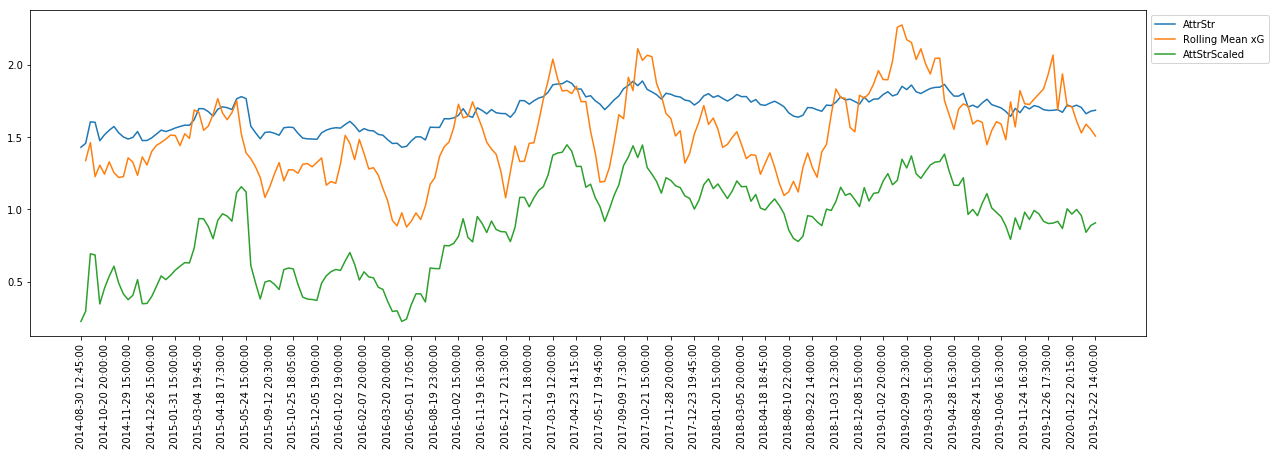

In [69]:
man_utd = ema_target[ema_target["f_Team"]=="Manchester United"]
AttStr = np.array(man_utd["AttStr"])
AttStrScaled = np.array(man_utd["AttStrScaled"])
AMV = np.array(man_utd["f_AMVIndex"])
DefStr = np.array(man_utd["DefStr"])
Goals = np.array(man_utd["t_Goals"].transform(lambda row: row.rolling(window=10, min_periods=2).mean()))
xG = np.array(man_utd["t_US xG"].transform(lambda row: row.rolling(window=10, min_periods=2).mean()))
dates = np.array(man_utd["matchdate"])
#print(Goals)
plt.figure(figsize=(20,6))
plt.plot(dates, AttStr, label="AttrStr")
# plt.plot(dates, AMV, label="AMV")
# plt.plot(dates,Goals,label ="Rolling Mean Goals")
plt.plot(dates,xG,label ="Rolling Mean xG")
plt.plot(dates,AttStrScaled,label ="AttStrScaled")
plt.legend(bbox_to_anchor=[1,1])
#plt.set_xticklabels(x[::2], rotation=90)
plt.xticks(dates[::5],rotation=90)
plt.show()
#man_utd.head()

In [58]:
ema_target.head()

,matchid,f_Team,gameweek,season,f_HmGame,fixture,matchdate,gw_no,f_Goals,f_Touches - Final Third Conceded,f_US xG Conceded,f_Shots On Target,f_Goal Attempts In Box Conceded,f_Touches - Final Third log,f_Passes - Final Third - Successful,f_Possession,f_Goals Conceded,f_Big Chances Conceded,f_US xG,f_Shots - Inside Box,f_Points,f_Passes - Final Third - Successful Conceded,f_Touches - Penalty Area Conceded,f_Shots Conceded,f_Shots On Target Conceded,...,f_Chances Conceded,f_xG Conceded,f_Touches - Final Third,f_Chances Created,f_Goals From Penalties,f_Goal Attempts,f_Touches - Penalty Area,f_netxg,f_xGRatio,f_ShotsRatio,f_ShOnTargetRatio,f_HmGameFut,t_Goals,t_Goals Conceded,t_US xG,t_US xG Conceded,t_Goals_Scored_In,t_Goals_Conceded_In,f_AMVIndex,gw_sq,opponent,AttStr,DefStr,AttStrScaled,DefStrScaled
0,/matches/755324/,Manchester United,Gameweek 3,2014,0.486111,Burnley vs Manchester United,2014-08-30 12:45:00,3,1.000000,98.777778,0.477677,3.972222,3.569444,5.375139,113.097222,57.744444,1.486111,0.000000,1.050831,5.430556,0.513889,35.708333,9.597222,8.083333,3.486111,...,7.569444,0.0,215.972222,7.916667,0.0,11.944444,16.916667,0.573154,0.687488,0.596394,0.332558,0,0,0,0.467281,0.513746,0,0,2.258965,3,Burnley,1.430597,0.847347,0.226085,2.221121
1,/matches/755324/,Burnley,Gameweek 3,2014,0.486111,Burnley vs Manchester United,2014-08-30 12:45:00,3,0.486111,146.638889,1.505202,1.486111,6.486111,5.014043,54.277778,41.537500,1.972222,1.972222,0.613794,6.027778,0.000000,84.263889,15.805556,10.486111,3.513889,...,7.458333,0.0,151.472222,7.000000,0.0,10.541667,14.652778,-0.891408,0.289663,0.501321,0.140975,1,0,0,0.513746,0.467281,0,0,0.227343,3,Manchester United,0.829850,1.666426,-1.374034,-1.431785
2,/matches/755327/,Stoke City,Gameweek 3,2014,0.486111,Manchester City vs Stoke City,2014-08-30 15:00:00,3,0.513889,129.458333,0.889425,2.513889,4.458333,5.217641,82.638889,61.294444,1.000000,1.000000,1.032733,8.597222,0.513889,41.111111,13.430556,8.027778,1.513889,...,5.000000,0.0,188.000000,10.000000,0.0,15.597222,22.138889,0.143309,0.537278,0.660200,0.161175,0,1,0,0.299792,0.891768,1,0,0.799835,3,Manchester City,1.283202,1.285421,-0.166510,0.267412
3,/matches/755327/,Manchester City,Gameweek 3,2014,0.513889,Manchester City vs Stoke City,2014-08-30 15:00:00,3,2.513889,188.527778,0.932851,4.486111,7.972222,5.158759,105.097222,54.863889,0.513889,1.000000,1.394824,7.458333,3.000000,83.958333,23.513889,11.486111,1.541667,...,9.000000,0.0,175.041667,8.944444,0.0,10.944444,22.972222,0.461972,0.599235,0.487926,0.409898,1,0,1,0.891768,0.299792,0,1,2.469774,3,Stoke City,1.654933,0.966909,0.823613,1.687900
4,/matches/755328/,Crystal Palace,Gameweek 3,2014,0.513889,Newcastle United vs Crystal Palace,2014-08-30 15:00:00,3,1.000000,213.138889,1.443860,3.027778,8.055556,4.639955,35.472222,34.219444,2.513889,2.486111,0.394094,3.055556,0.000000,94.513889,24.027778,15.541667,7.027778,...,12.541667,0.0,110.027778,5.569444,0.0,6.569444,13.222222,-1.049766,0.214420,0.297111,0.460888,0,3,3,1.660560,1.697760,1,1,0.394750,3,Newcastle United,0.747198,1.704515,-1.594181,-1.601654
